## Practice Notebook — Portfolio Simulation Prep
This notebook documents my early experiments leading up to Stage 7 (Portfolio Optimization).  
I practiced data cleaning, covariance matrix computation, and random portfolio simulations to build intuition before formal optimization.


### 😤 Side Note — The "Adj Close" Frustration

If you've ever used `yfinance`, you know the pain.

Sometimes it gives `"Close"`, sometimes `"Adj Close"`, and sometimes a **multi-level column** nightmare.  
When all you want is a clean price series, it throws a hierarchy of confusion your way.

I spent way too long fixing this nonsense — just to get a simple DataFrame that wouldn’t break every few runs.  
Lesson learned: **real-world data is messy**, and half the job is cleaning it before the math even starts.


**Portfolio Covariance & Variance Analysis**

tasks inside:

import 3–5 real stocks (AAPL, MSFT, GOOGL, NVDA, AMZN)

calculate & visualize correlation matrix (heatmap)

compute portfolio volatility for a few random weight combinations


In [ ]:

import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
tickers = ["AAPL", "MSFT", "GOOG", "AMZN", "META"]

# Download Adjusted Close prices (handles multi-level columns)
data = yf.download(tickers, start="2020-01-01", end="2024-01-01")
data.head()




/tmp/ipython-input-1633052159.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start="2020-01-01", end="2024-01-01")
[*********************100%***********************]  5 of 5 completed


Price           Close                                                \
Ticker           AAPL       AMZN       GOOG        META        MSFT   
Date                                                                  
2020-01-02  72.538528  94.900497  67.903816  208.494675  152.791153   
2020-01-03  71.833298  93.748497  67.570602  207.391495  150.888596   
2020-01-06  72.405678  95.143997  69.236702  211.297440  151.278610   
2020-01-07  72.065132  95.343002  69.193481  211.754578  149.899277   
2020-01-08  73.224403  94.598503  69.738770  213.901382  152.286957   

Price            High                                                ...  \
Ticker           AAPL       AMZN       GOOG        META        MSFT  ...   
Date                                                                 ...   
2020-01-02  72.598907  94.900497  67.942052  208.504608  152.895792  ...   
2020-01-03  72.594063  94.309998  68.158582  209.110891  152.153771  ...   
2020-01-06  72.444321  95.184502  69.350418  211.476329  151.345205  ...   
2020-01-07  72.671325  95.694504  69.672700  213.265269  151.887403  ...   
2020-01-08  73.526295  95.550003  70.099301  214.915137  152.962357  ...   

Price            Open                                                \
Ticker           AAPL       AMZN       GOOG        META        MSFT   
Date                                                                  
2020-01-02  71.545905  93.750000  66.621590  205.483241  151.040841   
2020-01-03  71.765674  93.224998  66.934953  205.940449  150.603230   
2020-01-06  70.954188  93.000000  67.041223  205.433579  149.423659   
2020-01-07  72.415322  95.224998  69.421921  211.516058  151.554471   
2020-01-08  71.768079  94.902000  69.130922  211.694983  151.183494   

Price          Volume                                          
Ticker           AAPL      AMZN      GOOG      META      MSFT  
Date                                                           
2020-01-02  135480400  80580000  28132000  12077100  22622100  
2020-01-03  146322800  75288000  23728000  11188400  21116200  
2020-01-06  118387200  81236000  34646000  17058900  20813700  
2020-01-07  108872000  80898000  30054000  14912400  21634100  
2020-01-08  132079200  70160000  30560000  13475000  27746500  

[5 rows x 25 columns]

### 📈 Covariance and Correlation — Intuition

#### 🧮 Covariance (Raw Relationship)

If both stocks’ daily returns rise and fall together, their **covariance is positive**.  
If one rises when the other falls, **covariance is negative**.

Mathematically:

\[
\text{Cov}(X, Y) = \frac{1}{n - 1} \sum_{i=1}^{n} (X_i - \bar{X})(Y_i - \bar{Y})
\]

Where:  
- \(X_i, Y_i\) → daily returns of each stock  
- \(\bar{X}, \bar{Y}\) → their average daily returns  

If both are usually above their mean together → positive product → **positive covariance**.  

⚠️ **Problem:** Covariance depends on *scale*.  
If one stock has larger absolute returns, the covariance value inflates — so we can’t compare it directly across different stocks or markets.

---

#### 🔗 Correlation (Normalized Relationship)

To fix that, we normalize covariance by dividing by both stocks’ standard deviations:

\[
\rho_{XY} = \frac{\text{Cov}(X, Y)}{\sigma_X \, \sigma_Y}
\]

Now correlation, \( \rho_{XY} \), is always between **−1 and 1**:

- **+1** → perfect positive relationship  
- **−1** → perfect negative relationship  
- **0** → no relationship  

✅ That’s why we use **correlation** in portfolio analysis — it tells us *how stocks move relative to each other*, not in absolute terms.


/tmp/ipython-input-2976582960.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(t, start="2023-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-2976582960.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(t, start="2023-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-2976582960.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(t, start="2023-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-2976582960.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(t, start="2023-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed


Covariance Matrix:
            AAPL      MSFT     GOOGL      AMZN
AAPL   0.000181  0.000097  0.000109  0.000101
MSFT   0.000097  0.000204  0.000141  0.000171
GOOGL  0.000109  0.000141  0.000339  0.000204
AMZN   0.000101  0.000171  0.000204  0.000373 

Correlation Matrix:
            AAPL      MSFT     GOOGL      AMZN
AAPL   1.000000  0.504955  0.439894  0.387727
MSFT   0.504955  1.000000  0.535189  0.621065
GOOGL  0.439894  0.535189  1.000000  0.573608
AMZN   0.387727  0.621065  0.573608  1.000000 



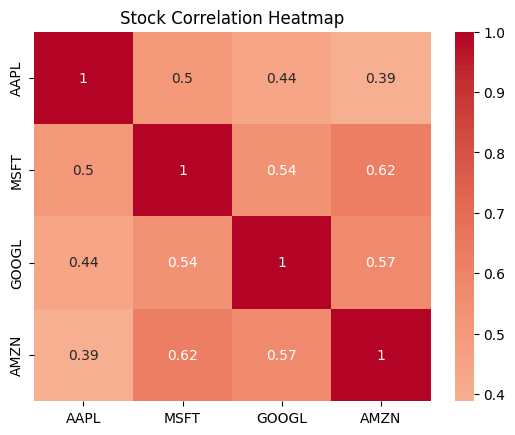

In [ ]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
tickers = ["AAPL", "MSFT", "GOOGL", "AMZN"]
data = pd.DataFrame()

for t in tickers:
    df = yf.download(t, start="2023-01-01", end="2024-12-31")
    data[t] = df['Close'] # Append data for each ticker


data = data.dropna()


returns = data.pct_change().dropna()

cov_matrix = returns.cov()
corr_matrix = returns.corr()

print("Covariance Matrix:\n", cov_matrix, "\n")
print("Correlation Matrix:\n", corr_matrix, "\n")


sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Stock Correlation Heatmap")
plt.show()

In [ ]:
#  Mini 2: Covariance vs Correlation
import yfinance as yf
import pandas as pd
import numpy as np


tickers = ["AAPL", "MSFT", "GOOG", "AMZN", "NVDA"]
data = yf.download(tickers, start="2022-01-01", end="2025-01-01")["Close"]


returns = data.pct_change().dropna()


cov_matrix = returns.cov()
corr_matrix = returns.corr()

print("Covariance Matrix:\n", cov_matrix, "\n")
print("Correlation Matrix:\n", corr_matrix, "\n")

cov_xy = cov_matrix.loc["AAPL", "MSFT"]
std_x = returns["AAPL"].std()
std_y = returns["MSFT"].std()
manual_corr = cov_xy / (std_x * std_y)

print(f"Manual correlation (AAPL-MSFT): {manual_corr:.4f}")
print(f"Built-in correlation (AAPL-MSFT): {corr_matrix.loc['AAPL','MSFT']:.4f}")


/tmp/ipython-input-1211507312.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start="2022-01-01", end="2025-01-01")["Close"]
[*********************100%***********************]  5 of 5 completed

Covariance Matrix:
 Ticker      AAPL      AMZN      GOOG      MSFT      NVDA
Ticker                                                  
AAPL    0.000291  0.000232  0.000219  0.000203  0.000330
AMZN    0.000232  0.000583  0.000325  0.000289  0.000468
GOOG    0.000219  0.000325  0.000426  0.000249  0.000395
MSFT    0.000203  0.000289  0.000249  0.000302  0.000386
NVDA    0.000330  0.000468  0.000395  0.000386  0.001212 

Correlation Matrix:
 Ticker      AAPL      AMZN      GOOG      MSFT      NVDA
Ticker                                                  
AAPL    1.000000  0.563399  0.621259  0.684811  0.554703
AMZN    0.563399  1.000000  0.653028  0.689277  0.556631
GOOG    0.621259  0.653028  1.000000  0.694575  0.549777
MSFT    0.684811  0.689277  0.694575  1.000000  0.637968
NVDA    0.554703  0.556631  0.549777  0.637968  1.000000 

Manual correlation (AAPL-MSFT): 0.6848
Built-in correlation (AAPL-MSFT): 0.6848


In [ ]:
#  Mini 3: Portfolio Return & Volatility
import numpy as np


mean_returns = returns.mean()
cov_matrix = returns.cov()


weights = np.random.random(len(tickers))
weights /= np.sum(weights)


port_return = np.dot(weights, mean_returns)
port_variance = np.dot(weights.T, np.dot(cov_matrix, weights))
port_volatility = np.sqrt(port_variance)

print("Weights:", dict(zip(tickers, np.round(weights, 3))))
print(f"\nExpected Portfolio Return: {port_return:.4f}")
print(f"Portfolio Volatility: {port_volatility:.4f}")


Weights: {'AAPL': np.float64(0.19), 'MSFT': np.float64(0.169), 'GOOG': np.float64(0.09), 'AMZN': np.float64(0.309), 'NVDA': np.float64(0.242)}

Expected Portfolio Return: 0.0010
Portfolio Volatility: 0.0193


# 🧮 Portfolio Covariance and Variance — Concept

## 1. From Prices to Returns
To understand portfolio risk, we first convert stock prices into **daily returns**.  
A daily return measures how much a stock’s price changes relative to the previous day:

\[
r_t = \frac{P_t - P_{t-1}}{P_{t-1}}
\]

This gives us a matrix of returns — one column per stock, one row per day.

---

## 2. The Covariance Matrix (Σ)
Once we have returns, we calculate the **covariance matrix**, usually denoted as \( \Sigma \).  
Each element \( \sigma_{ij} \) represents how two stocks move together:

\[
\sigma_{ij} = E[(r_i - \bar{r_i})(r_j - \bar{r_j})]
\]

- If \( \sigma_{ij} > 0 \), both stocks tend to move together.  
- If \( \sigma_{ij} < 0 \), they tend to move in opposite directions.  
- The diagonal elements \( \sigma_{ii} \) represent each stock’s **variance** — its own volatility.

The covariance matrix captures how all assets in the portfolio interact with one another.

---

## 3. Portfolio Weights (w)
Each stock in a portfolio has a **weight** — the fraction of total capital invested in it.  
For example, if we have 5 stocks with equal allocation, each weight is 0.2.

We represent the weights as a vector:

\[
w =
\begin{bmatrix}
w_1 \\
w_2 \\
w_3 \\
w_4 \\
w_5
\end{bmatrix}
\]

Weights always sum to 1:

\[
\sum_i w_i = 1
\]

---

## 4. Portfolio Variance
The total **portfolio risk** isn’t just the sum of individual variances —  
it depends on how the stocks **co-move**.  

Mathematically, this is expressed as:

\[
\sigma_p^2 = w^T \Sigma w
\]

Expanding this gives:

\[
\sigma_p^2 = \sum_i \sum_j w_i w_j \sigma_{ij}
\]

Each term \( w_i w_j \sigma_{ij} \) contributes to the total risk:
- If two stocks are **positively correlated**, they increase portfolio risk.  
- If **negatively correlated**, they reduce it — this is **diversification**.

---

## 5. Portfolio Standard Deviation
To express risk as volatility, we take the square root of variance:

\[
\sigma_p = \sqrt{\sigma_p^2}
\]

This represents the **standard deviation of portfolio returns**,  
interpreted as the average percentage fluctuation of the portfolio’s value.

---

## 6. Visualizing Covariance
A **heatmap** of the covariance matrix helps visualize relationships between assets:
- Darker cells (high positive values) = strong co-movement.  
- Lighter or negative cells = weak or opposite movement → better diversification.

---

## 7. Intuition
Even if individual stocks are volatile, combining them with the right weights can **reduce total portfolio risk**,  
because of weak or negative correlations between assets.

This process —  
from **returns → covariance → portfolio variance** —  
is the mathematical foundation of **Modern Portfolio Theory (MPT)**,  
which aims to balance **risk and return** optimally.

---


/tmp/ipython-input-1594712215.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start="2020-01-01", end="2025-01-01")["Close"]
[*********************100%***********************]  5 of 5 completed


Covariance Matrix:
 Ticker      AAPL      AMZN     GOOGL      MSFT      NVDA
Ticker                                                  
AAPL    0.000398  0.000268  0.000265  0.000287  0.000411
AMZN    0.000268  0.000513  0.000300  0.000295  0.000446
GOOGL   0.000265  0.000300  0.000419  0.000293  0.000413
MSFT    0.000287  0.000295  0.000293  0.000369  0.000445
NVDA    0.000411  0.000446  0.000413  0.000445  0.001152

Portfolio Variance: 0.000388
Portfolio Standard Deviation: 0.019695


<Axes: xlabel='Ticker', ylabel='Ticker'>

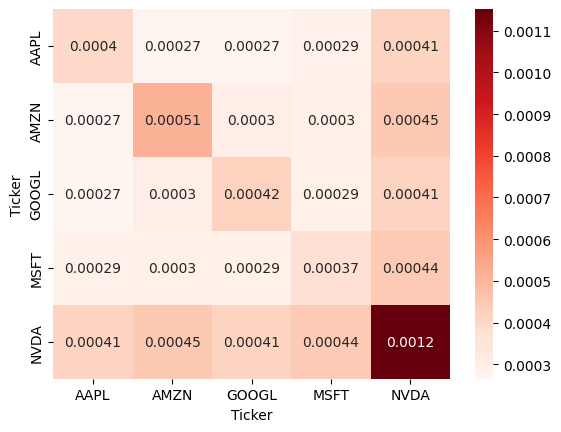

In [ ]:
#  Mini Project 4: Covariance Matrix & Portfolio Variance

import yfinance as yf
import numpy as np
import pandas as pd
tickers = ["AAPL", "MSFT", "GOOGL", "AMZN", "NVDA"]
data = yf.download(tickers, start="2020-01-01", end="2025-01-01")["Close"]


returns = data.pct_change().dropna()


cov_matrix = returns.cov()


weights = np.array([1/len(tickers)] * len(tickers))

port_variance = np.dot(weights.T, np.dot(cov_matrix, weights))
port_std_dev = np.sqrt(port_variance)

print("Covariance Matrix:\n", cov_matrix)
print("\nPortfolio Variance:", round(port_variance, 6))
print("Portfolio Standard Deviation:", round(port_std_dev, 6))
sns.heatmap(cov_matrix, annot=True, cmap="Reds")


#Mini Project 4 – Covariance Matrix & Portfolio Variance
# ----------------------------------------------------------
# In this mini project, we'll calculate the covariance matrix between multiple stocks
# and use it to compute total portfolio risk (variance & standard deviation).
#
# 📘 Concept:
# Portfolio variance measures how the returns of assets combine together —
# not just their individual volatilities, but also how they move *relative* to one another.
#
# Formula:
#     σ_p² = wᵀ Σ w
#
# where:
#   Σ = covariance matrix of returns
#   w = vector of portfolio weights
#
# We'll see how diversification reduces total risk.

/tmp/ipython-input-475138417.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  raw = yf.download(tickers, start=start_date, end=end_date, progress=False)


Best Sharpe portfolio (annual):
Return: 0.5835
Volatility: 0.4189
Sharpe: 1.3689
Weights: {'AAPL': np.float64(0.1878), 'MSFT': np.float64(0.1481), 'GOOGL': np.float64(0.0267), 'AMZN': np.float64(0.0113), 'NVDA': np.float64(0.6261)}

Saved best_sharpe_weights.csv


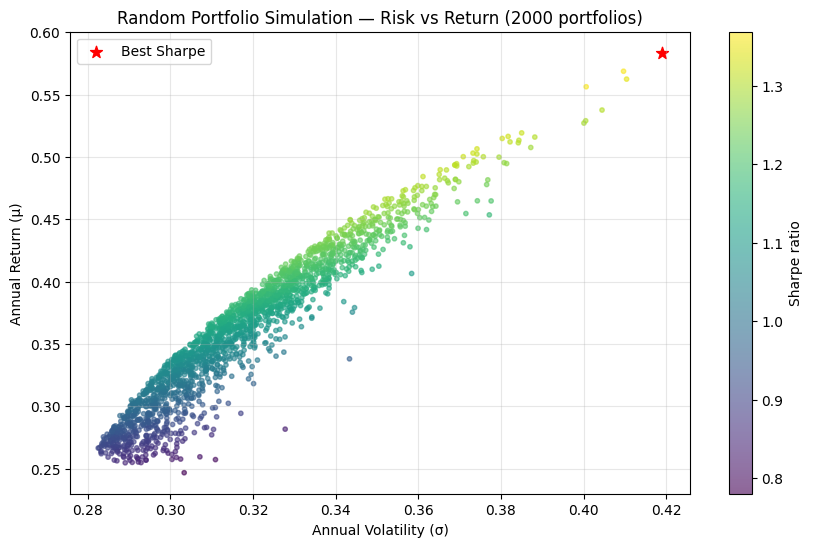


Top 214 Sharpe: return=0.5835, vol=0.4189, sharpe=1.3689
weights: {'AAPL': np.float64(0.1878), 'MSFT': np.float64(0.1481), 'GOOGL': np.float64(0.0267), 'AMZN': np.float64(0.0113), 'NVDA': np.float64(0.6261)}

Top 1058 Sharpe: return=0.5687, vol=0.4097, sharpe=1.3637
weights: {'AAPL': np.float64(0.2165), 'MSFT': np.float64(0.1416), 'GOOGL': np.float64(0.0302), 'AMZN': np.float64(0.0168), 'NVDA': np.float64(0.5949)}

Top 1168 Sharpe: return=0.5562, vol=0.4006, sharpe=1.3634
weights: {'AAPL': np.float64(0.2701), 'MSFT': np.float64(0.0934), 'GOOGL': np.float64(0.0605), 'AMZN': np.float64(0.0108), 'NVDA': np.float64(0.5652)}

Top 979 Sharpe: return=0.5623, vol=0.4104, sharpe=1.3458
weights: {'AAPL': np.float64(0.0528), 'MSFT': np.float64(0.0964), 'GOOGL': np.float64(0.1952), 'AMZN': np.float64(0.0588), 'NVDA': np.float64(0.5968)}

Top 1386 Sharpe: return=0.5147, vol=0.3803, sharpe=1.3272
weights: {'AAPL': np.float64(0.1672), 'MSFT': np.float64(0.0488), 'GOOGL': np.float64(0.2227), 'AMZN': 

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt


tickers = ["AAPL", "MSFT", "GOOGL", "AMZN", "NVDA"]
start_date = "2020-01-01"
end_date = "2025-01-01"
n_portfolios = 2000
np.random.seed(42)

raw = yf.download(tickers, start=start_date, end=end_date, progress=False)
if ("Close" in raw.columns) and not isinstance(raw.columns, pd.MultiIndex):
    prices = raw["Close"]
else:

    if isinstance(raw.columns, pd.MultiIndex):

        try:
            prices = raw.xs("Close", axis=1, level=0)
        except Exception:

            prices = pd.DataFrame()
            for t in tickers:
                d = yf.download(t, start=start_date, end=end_date, progress=False)
                prices[t] = d["Close"]
    else:

        prices = pd.DataFrame()
        for t in tickers:
            d = yf.download(t, start=start_date, end=end_date, progress=False)
            prices[t] = d["Close"]


prices = prices.dropna(how="all", axis=1)
available = [c for c in tickers if c in prices.columns]
prices = prices[available].ffill().dropna()
if prices.shape[0] < 2 or len(available) < 2:
    raise RuntimeError("Not enough price data for the chosen tickers. Check ticker names or date range.")


returns = prices.pct_change().dropna()

mu_daily = returns.mean()
cov_daily = returns.cov()

trading_days = 252
mu_annual = mu_daily * trading_days
cov_annual = cov_daily * trading_days


results = np.zeros((n_portfolios, 4))

weights_record = [] # Initialize weights_record
risk_free = 0.01

for i in range(n_portfolios):
    w = np.random.random(len(available))
    w /= np.sum(w)
    weights_record.append(w)

    port_ret = np.dot(w, mu_annual.values)

    port_var = np.dot(w.T, np.dot(cov_annual.values, w))
    port_vol = np.sqrt(port_var)

    sharpe = (port_ret - risk_free) / port_vol if port_vol != 0 else 0.0

    results[i, 0] = port_ret
    results[i, 1] = port_vol
    results[i, 2] = sharpe
    results[i, 3] = 0.0

res_df = pd.DataFrame(results, columns=["annual_return", "annual_vol", "sharpe", "extra"])
res_df["weights"] = weights_record


best_idx = res_df["sharpe"].idxmax()
best_port = res_df.loc[best_idx]
best_weights = dict(zip(available, np.round(best_port["weights"], 4)))

print("Best Sharpe portfolio (annual):")
print("Return:", round(best_port["annual_return"], 4))
print("Volatility:", round(best_port["annual_vol"], 4))
print("Sharpe:", round(best_port["sharpe"], 4))
print("Weights:", best_weights)


pd.DataFrame([best_weights]).T.rename(columns={0:"weight"}).to_csv("best_sharpe_weights.csv")
print("\nSaved best_sharpe_weights.csv")


plt.figure(figsize=(10,6))
sc = plt.scatter(res_df["annual_vol"], res_df["annual_return"],
                 c=res_df["sharpe"], cmap="viridis", alpha=0.6, s=10)
plt.colorbar(sc, label="Sharpe ratio")
plt.scatter(best_port["annual_vol"], best_port["annual_return"], color="red", s=80, marker="*", label="Best Sharpe")
plt.xlabel("Annual Volatility (σ)")
plt.ylabel("Annual Return (μ)")
plt.title("Random Portfolio Simulation — Risk vs Return ({} portfolios)".format(n_portfolios))
plt.legend()
plt.grid(alpha=0.3)
plt.show()


top5 = res_df.sort_values("sharpe", ascending=False).head(5)
for i, row in top5.iterrows():
    w = dict(zip(available, np.round(row["weights"], 4)))
    print(f"\nTop {i} Sharpe: return={row['annual_return']:.4f}, vol={row['annual_vol']:.4f}, sharpe={row['sharpe']:.4f}")
    print("weights:", w)

# 🎲 Mini Project  — Random Portfolio Simulation

This mini project builds on previous stages of Monte Carlo simulations by introducing the concept of **portfolio diversification** — how combining multiple assets can reduce overall risk while maintaining or improving returns.

Instead of simulating stock price paths over time, here we focus on how different **portfolio weight combinations** affect *expected return* and *risk*.

---

## 🚀 Objective

- Generate **random portfolios** of real stocks.
- Compute each portfolio’s **expected annual return**, **annualized volatility**, and **Sharpe ratio**.
- Visualize the **risk–return tradeoff** for thousands of possible portfolios.
- Identify the portfolio with the **highest Sharpe ratio** (best risk-adjusted performance).

---

## 🧠 Core Concepts

| Concept | Description |
|----------|--------------|
| **Portfolio Return (μₚ)** | Weighted average of individual asset returns.<br>Formula:  μₚ = wᵀ · μ |
| **Portfolio Variance (σₚ²)** | Measures total portfolio risk, considering both individual volatilities and correlations.<br>Formula: σₚ² = wᵀ · Σ · w |
| **Sharpe Ratio** | Risk-adjusted measure of return.<br>Formula: (μₚ - r_f) / σₚ |
| **Covariance Matrix (Σ)** | Captures how pairs of assets move together; positive values mean they tend to move in the same direction. |
| **Weights (w)** | Allocation proportions of capital among assets, which always sum to 1. |

---

## 🧩 Intuition Behind the Math

- Each stock has its own *expected return* (μ) and *volatility* (σ).  
- When you combine several stocks, their risks don’t simply add — they **partially cancel out** due to imperfect correlation.
- This diversification reduces total risk, which is why portfolios are safer than single stocks.
- Matrix multiplication (`w.T @ Σ @ w`) elegantly computes the combined risk from all pairwise relationships between assets.

---

## ⚙️ Workflow

1. **Fetch real stock data** (`yfinance`) and compute daily returns.  
2. **Calculate mean returns** and **covariance matrix** (annualized).  
3. **Generate thousands of random portfolios**, each with random weights summing to 1.  
4. For each portfolio, compute:
   - Expected annual return (μₚ)
   - Annualized volatility (σₚ)
   - Sharpe ratio  
5. **Visualize** all portfolios on a risk–return plot.
6. **Highlight** the one with the highest Sharpe ratio (optimal tradeoff).

---

## 📈 Expected Output

- A scatter plot showing the **risk–return cloud**, where each point is a random portfolio.  
- The **red star** marks the portfolio with the best Sharpe ratio.  
- The shape of the cloud hints at the **Efficient Frontier** — the curve of optimal portfolios, which we’ll formally compute in the next stage.

---

## 🧰 Tech Stack

- **Python** — numerical computation  
- **NumPy** — random weights, matrix math  
- **Pandas** — data management & returns  
- **Matplotlib / Seaborn** — visualization  
- **yFinance** — real market data  

---




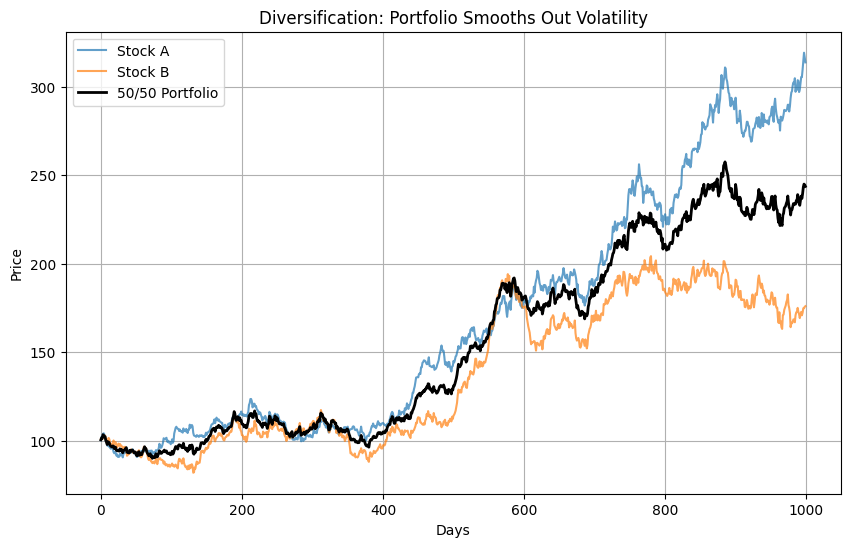

Volatility (std of daily returns):
Stock A: 0.01257
Stock B: 0.01521
Portfolio: 0.01106


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Step 1: Simulate two assets ---
np.random.seed(42)
days = 1000

# Stock A: 10% mean annual return, 20% volatility
# Stock B: 12% mean annual return, 25% volatility
# We'll assume daily returns ~ N(mean/252, vol/sqrt(252))
mean_A, vol_A = 0.10/252, 0.20/np.sqrt(252)
mean_B, vol_B = 0.12/252, 0.25/np.sqrt(252)

# correlation between A and B
corr = 0.3   # not perfectly correlated
cov = corr * vol_A * vol_B

# covariance matrix
cov_matrix = np.array([[vol_A**2, cov],
                       [cov, vol_B**2]])

# generate correlated daily returns
returns = np.random.multivariate_normal([mean_A, mean_B], cov_matrix, days)
returns_A, returns_B = returns.T

# --- Step 2: Portfolio of 50% A and 50% B ---
weights = np.array([0.5, 0.5])
portfolio_returns = returns.dot(weights)

# --- Step 3: Convert to cumulative returns (simulate prices) ---
price_A = 100 * np.cumprod(1 + returns_A)
price_B = 100 * np.cumprod(1 + returns_B)
price_port = 100 * np.cumprod(1 + portfolio_returns)

# --- Step 4: Plot everything ---
plt.figure(figsize=(10,6))
plt.plot(price_A, label='Stock A', alpha=0.7)
plt.plot(price_B, label='Stock B', alpha=0.7)
plt.plot(price_port, label='50/50 Portfolio', color='black', linewidth=2)
plt.title("Diversification: Portfolio Smooths Out Volatility")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

# --- Step 5: Compare volatility ---
print("Volatility (std of daily returns):")
print(f"Stock A: {returns_A.std():.5f}")
print(f"Stock B: {returns_B.std():.5f}")
print(f"Portfolio: {portfolio_returns.std():.5f}")


# 🧠 Understanding Portfolio Diversification — Step by Step

## 🌱 What’s Happening Conceptually

The goal of this project is to **show why combining assets (stocks)** can *reduce overall risk* even when each stock is individually risky.  
This principle is called **diversification**, and it forms the foundation of **Modern Portfolio Theory (Markowitz, 1952 — Nobel Prize work)**.

When two assets don’t move perfectly together (their **correlation** ρ < 1),  
their ups and downs partially cancel each other out.  
This means the **portfolio volatility** (overall risk) is lower than the average of the individual risks.

---

## 🧩 Step-by-Step Intuition

### **Step 1 — Define Two Assets**

We start with two imaginary stocks — **A** and **B**.

Each has:
- **Expected Return (μ)** — how much it grows on average.  
- **Volatility (σ)** — how much it fluctuates daily.  
- **Correlation (ρ)** — how similarly they move together.

We represent their relationships in a **covariance matrix**:

\[
\Sigma =
\begin{bmatrix}
σ_A^2 & ρσ_Aσ_B \\
ρσ_Aσ_B & σ_B^2
\end{bmatrix}
\]

This tells us how each stock’s returns vary with itself and with the other.

---

### **Step 2 — Generate Random Returns**

Using the covariance matrix, we generate random daily returns for both A and B.  
They are not independent — the correlation (ρ) ensures that when A goes up,  
B tends to move in a somewhat related way.

This step mimics real-world market behavior — daily randomness with controlled relationships.

---

### **Step 3 — Build a Portfolio**

We now combine A and B into a portfolio.  
Suppose we invest 50% in each:

\[
r_p = w_A r_A + w_B r_B
\]

Here \( w_A = 0.5 \) and \( w_B = 0.5 \).  
The portfolio’s return each day is the **weighted sum** of each asset’s return.

---

### **Step 4 — From Returns to Prices**

We start from an initial portfolio value of 100 (₹ or \$) and compound it:

\[
P_t = P_{t-1} (1 + r_p)
\]

This shows how the total value of the portfolio changes day-by-day.

---

### **Step 5 — Calculate Risk and Return**

Over the whole simulation:
- **Mean return (μₚ)** = average of daily portfolio returns  
- **Volatility (σₚ)** = standard deviation of portfolio returns

If we vary the weights \( w_A \) and \( w_B \), we get different combinations of (μₚ, σₚ).  
Plotting them gives a **Risk-Return trade-off curve**.

---

### **Step 6 — The Diversification Effect**

When assets are *not perfectly correlated*,  
the portfolio’s volatility is **less than the weighted average** of individual volatilities.

That’s the mathematical proof of “don’t put all your money in one place.”  
The reason diversification works isn’t luck — it’s **linear algebra + probability**.

---

### **Summary**

| Concept | Meaning |
|----------|----------|
| Mean (μ) | Expected return |
| Volatility (σ) | Risk or variability |
| Correlation (ρ) | Relationship between assets |
| Covariance matrix | Encodes ρ and σ values together |
| Portfolio return | Weighted sum of returns |
| Portfolio risk | Depends on covariance, not just individual σ |

---

📘 **In short:**  
Diversification lowers portfolio volatility because different assets don’t all fall (or rise) together.  
This project makes that intuition *visible and measurable*.


### Reflection
Key learnings:
- Handling messy market data with `yfinance`
- Understanding covariance between assets
- Linking code with the Markowitz diversification concept
Next steps:
- Implement efficient frontier
- Optimize Sharpe ratio portfolios
